In [1]:
import numpy as np
def regularize(x_nu, t_nu, t):
    """
    Function to regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.

    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        
        # Select the spots in x (wanted trajectory) to set.
        s_end = np.where(t < t_nu[i+1])[0][-1]                 

        # Assign the values of the segment.
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1]-t_nu[i]) 
        
        # Update the position in the wanted trajectory.
        s = s_end + 1                                           
        
    return x

In [2]:
def normalize(x_nn):
    """
    Function to normalize a regular trajectory.
    
    Parameters
    ==========
    x_nn : Trajectory (x component) non-nrmalized.
    """
    x = np.zeros(np.size(x_nn))
    dx = x_nn[1:] - x_nn[0:-1]
    
    sigma = np.std(dx**2)
    
    x = x_nn[0] + np.cumsum(dx / sigma)
    
    mu = np.mean(x)
    
    x -= mu
        
    return x

## P1

In [3]:
def lw_1D(T,alpha,v):
    import numpy as np
    x = []
    t = []
    x.append(0)
    t.append(0)
    #Continue until the previous time exceeds the duration
    while t[-1]<T:
        dt = np.random.rand()**(-1/(3-alpha))   
        #Cumulative sum     
        t.append(t[-1] + dt)
        w = np.random.choice([-1,1])
        x.append(x[-1] + v*w*dt)  
    return x,t

Uncomment to visualize what the regularization does.

In [ ]:
duration = 100
dt = 0.1
## round up to cover all steps, also scaöe by dt.
t = np.arange(int(np.ceil(duration / dt))) * dt
v = 1 # constant velocity
alpha = 2
runs = 5
trajectories = np.zeros((runs,len(t))) #row 1 is x, row 2 is time. 
for run in range(runs):
    x, t_sum = lw_1D(duration,alpha,v)
    x = regularize(x,t_sum,t)
    trajectories[run] = x
    
"""
x, t_sum = lw_1D(duration,alpha,v)
x_r = regularize(x,t_sum,t)
"""


Uncomment to visualize what the regularization does.


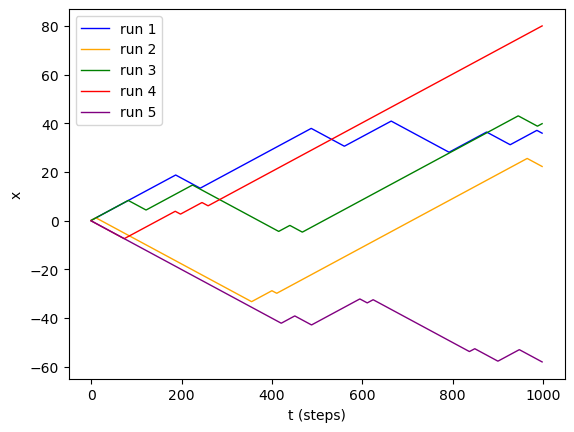

In [5]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple']
for run in range(runs):
    plt.plot(trajectories[run][1:], '-', color=colors[run], linewidth=1, label=f'run {run+1}')

"""
plt.plot(t_sum,x, 'o-', color='g', linewidth=1, label='Levi walk alpha=2')
plt.plot(t, x_r, '.', color='k', label='Regularized')
plt.xlim([0, 3])
plt.ylim([0, 3])
"""
plt.legend()
plt.xlabel('t (steps)')
plt.ylabel('x')
plt.show()

## P2

In [6]:
def lw_2D(T,alpha,v):
    import numpy as np
    t = []
    x = []
    y = []
    x.append(0)
    y.append(0)
    t.append(0)
    while t[-1]<T:
        dt = np.random.rand()**(-1/(3-alpha))    
        #Cumulative sum        
        t.append(t[-1] + dt)
        phi = np.random.rand()*2*np.pi
        x.append(x[-1] + v*np.cos(phi)*dt)              
        y.append(y[-1] + v*np.sin(phi)*dt)               
    return x,y,t

In [7]:
duration = 100
dt = 0.1
t = np.arange(int(np.ceil(duration / dt))) * dt
v = 1 # constant velocity
alpha = 2
runs = 5
trajectories = np.zeros((2,runs,len(t))) #row 0 is x, row 1 y. 
for run in range(runs):
    x,y,t_sum = lw_2D(duration, alpha, v)
    x = regularize(x,t_sum,t)
    y = regularize(y,t_sum,t)
    trajectories[0][run] = x
    trajectories[1][run] = y

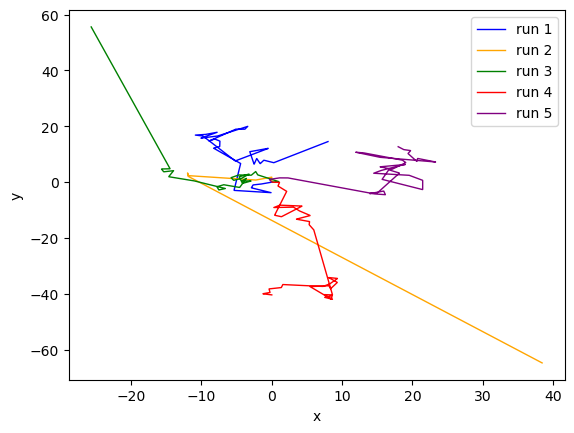

In [8]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple']
for run in range(runs):
    plt.plot(trajectories[0][run][1:],trajectories[1][run][1:], '-', color=colors[run], linewidth=1, label=f'run {run+1}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## P3

* Time MSD: Measures how far a single particle moves over time.

* Ensemble MSD: Measures how far many particles move on average at a specific time.

In [9]:
def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

In [10]:
def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

Calculate x_t for tMSD


In [11]:
t_tot = 10000 
N = 10000 
dt = 0.1  
v = 1

t_t = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_t = np.size(t_t)

x_t, t_sum= lw_1D(t_tot, alpha, v)
x_t = regularize(x_t, t_sum, t_t)


Calculate x_e for eMSD

In [ ]:
t_tot = 100 
N = 100  
dt = 0.1  

# Regular sampling with dt.
t_e = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_e = np.size(t_e)

N_traj = 100

x_e = np.zeros([N_traj, N_steps_e])

for i in range(N_traj):
    x, t_sum = lw_1D(t_tot, alpha, v)
    x_r = regularize(x,t_sum, t_e)
    x_e[i, :] = x_r

In [13]:
# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

# Calculate tMSD
tmsd = tMSD_1d(x_t, N_steps_e)  # tMSD from long trajectory.

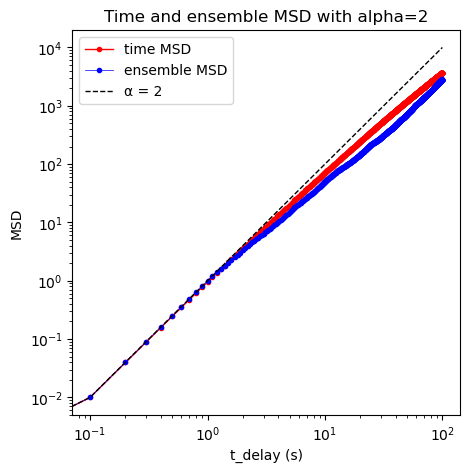

In [19]:
plt.figure(figsize=(5,5))
plt.loglog(t_e, tmsd, '.-', color='r', linewidth=1, 
         label='time MSD')
plt.loglog(t_e, emsd, '.-', color='b', linewidth=0.5, 
         label='ensemble MSD')
plt.loglog(t_e, t_e**alpha, 'k--', linewidth=1, label=f'α = {alpha}')
plt.title(f"Time and ensemble MSD with alpha={alpha}")
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Seems to be ergodic since the time and ensemble MSD aligns closely.